# Example code snippet showing working switch between plot panes

First show the minimalistic implementation of the `AppWindow` class.

In [1]:
%matplotlib widget
from bmcs_utils.demo.app_window import AppWindow as AW

In [2]:
aw = AW()

{'mpl': <bmcs_utils.demo.app_window.MPLBackend at 0x7f01d9123680>,
 'k3d': <bmcs_utils.demo.app_window.K3DBackend at 0x7f01c95d9270>}

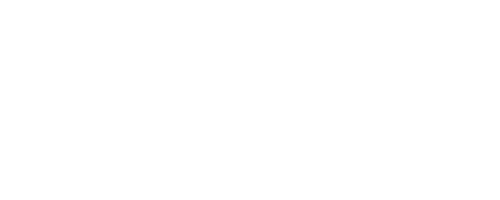

In [3]:
aw.plot_backend_table

In [4]:
aw.render()

# Interoperability between model tree and plot pane

Demonstrate the `AppWindow` in combination with a model. The model delivers
the tree to navigate through the model components, edit it and display via 
print and plot adapters (markdown, matplotlib, k3d)

In [5]:
%matplotlib widget
from bmcs_utils.demo.model_with_volume import ModelWithVolume
import bmcs_utils.api as bu

In [6]:
class TopLevelModel(bu.Model):
    name = 'example of a top-level model'
    a = bu.Float(8)
    volume = bu.Instance(ModelWithVolume, ())
    
    tree = ['volume']
    
    ipw_view = bu.View(
        bu.Item('a')
    )
    
    def update_plot(self,ax):
        pass

Instantiate the model and render it for interaction. Subcomponents
have different plot adapters which are immediately rendered to the plot pane.
The `AppWindow` can be launched from any model by issuing the `interact` or `app` method.

In [7]:
tl = TopLevelModel()

In [8]:
tl.interact()

The subcomponent used in the previous example can be used as a top level component as well.

In [9]:
ModelWithVolume().app()